In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from word2number import w2n
warnings.filterwarnings("ignore")

In [ ]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=0defa70cafee176923e8f2034735a664350af6f5091d761884e5efe1084f12b8
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [7]:
data_folder = 'data/'
cdot2019 = pd.read_excel(data_folder + "CDOT2019.xlsx")

In [9]:
cdot2018 = pd.read_excel(data_folder + "CDOT2018.xlsx")
cdot2017 = pd.read_excel(data_folder + "CDOT2017.xlsx")

In [10]:
cdot2019.head(20)

,system,rte,sec,mp,date,time,severity,injlevel_1,injlevel_2,injlevel_3,...,drvinj_1,drvinj_2,drvinj_3,dui_1,dui_2,dui_3,city,county,latitude,longitude
0,CITY STREET,0.0,NaN,0.0,2019-03-19,11:44,PDO,2.0,0.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,NORTHGLENN,ADAMS,0.000000,0.000000
1,CITY STREET,0.0,NaN,0.0,2019-05-23,22:51,PDO,1.0,0.0,0.0,...,NO INJURY,NaN,NaN,N,N,N,MONTROSE,MONTROSE,0.000000,0.000000
2,CITY STREET,0.0,NaN,0.0,2019-02-18,13:09,PDO,2.0,0.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,PUEBLO,PUEBLO,0.000000,0.000000
3,CITY STREET,0.0,NaN,0.0,2019-04-04,16:59,PDO,2.0,0.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,AURORA,ARAPAHOE,0.000000,0.000000
4,CITY STREET,0.0,NaN,0.0,2019-12-27,07:42,PDO,0.0,0.0,0.0,...,NaN,NaN,NaN,N,N,N,DENVER,DENVER,39.713914,-105.021508
5,COUNTY ROAD,0.0,NaN,0.0,2019-01-11,07:10,PDO,1.0,0.0,0.0,...,NO INJURY,NaN,NaN,N,N,N,NaN,ALAMOSA,0.000000,0.000000
6,CITY STREET,0.0,NaN,0.0,2019-12-03,08:15,PDO,1.0,0.0,0.0,...,NaN,NO INJURY,NaN,N,N,N,DENVER,DENVER,39.738422,-104.974714
7,CITY STREET,0.0,NaN,0.0,2019-04-14,17:46,INJ,1.0,0.0,1.0,...,NON-INCAPACITATING INJURY,NO INJURY,NaN,N,N,N,WESTMINSTER,ADAMS,0.000000,0.000000
8,CITY STREET,0.0,NaN,0.0,2019-12-18,08:44,INJ,2.0,1.0,0.0,...,NO INJURY,POSSIBLE/COMPLAINT OF INJURY,NaN,N,N,N,THORNTON,ADAMS,0.000000,0.000000
9,CITY STREET,0.0,NaN,0.0,2019-03-09,09:46,PDO,1.0,0.0,0.0,...,NaN,NO INJURY,NaN,N,N,N,THORNTON,ADAMS,0.000000,0.000000


In [11]:
def generateStats(df,year):
    ret = df.groupby(by='condition')['condition'].count()
    ret = ret.to_frame()
    name = "cnt" + year
    ret = ret.rename(columns={"condition":name})
    ret = ret.reset_index()
    return ret

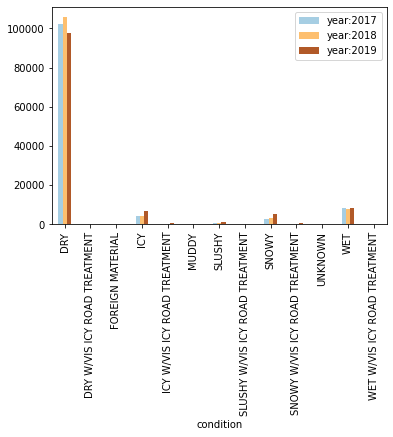

In [12]:
cd2019 = generateStats(cdot2019,"2019")
cd2018 = generateStats(cdot2018,"2018")
cd2017 = generateStats(cdot2017,"2017")
cdt_1718 = pd.merge(cd2017,cd2018)
cdt_17to19 = pd.merge(cdt_1718,cd2019)
cdt_17to19 = cdt_17to19.rename(columns={"cnt2017":"year:2017","cnt2018":"year:2018","cnt2019":"year:2019"})
cdt_17to19.plot(x = "condition",y = ["year:2017","year:2018","year:2019"], kind = "bar", colormap='Paired')

In [13]:
cdot = pd.concat([cdot2017,cdot2018,cdot2019])
cdot

,system,rte,sec,mp,date,time,severity,injlevel_1,injlevel_2,injlevel_3,...,drvinj_1,drvinj_2,drvinj_3,dui_1,dui_2,dui_3,city,county,latitude,longitude
0,CITY STREET,0.0,NaN,0.00,2017-01-04,21:45,PDO,2.0,0.0,0.0,...,NO INJURY,NaN,NaN,N,N,N,ARVADA,JEFFERSON,0.000000,0.000000
1,CITY STREET,0.0,NaN,0.00,2017-12-18,00:18,PDO,1.0,0.0,0.0,...,NO INJURY,NaN,NaN,Y,N,N,GREELEY,WELD,0.000000,0.000000
2,CITY STREET,0.0,NaN,0.00,2017-07-21,01:00,PDO,1.0,0.0,0.0,...,NO INJURY,NaN,NaN,N,N,N,DELTA,DELTA,0.000000,0.000000
3,CITY STREET,0.0,NaN,0.00,2017-06-05,15:29,PDO,2.0,0.0,0.0,...,NO INJURY,NaN,NaN,N,N,N,STERLING,LOGAN,0.000000,0.000000
4,CITY STREET,0.0,NaN,0.00,2017-09-12,09:36,INJ,1.0,1.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,COLORADO SPRINGS,EL PASO,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121627,STATE HIGHWAY,550.0,B,130.02,2019-12-12,10:00,PDO,2.0,0.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,MONTROSE,MONTROSE,38.487127,-107.886831
121628,STATE HIGHWAY,550.0,B,130.21,2019-07-26,14:29,PDO,2.0,0.0,0.0,...,NO INJURY,NO INJURY,NaN,N,N,N,MONTROSE,MONTROSE,38.489144,-107.889057
121629,STATE HIGHWAY,550.0,B,130.22,2019-05-15,13:50,INJ,1.0,5.0,0.0,...,NO INJURY,POSSIBLE/COMPLAINT OF INJURY,NaN,N,N,N,MONTROSE,MONTROSE,38.489240,-107.889162
121630,STATE HIGHWAY,550.0,B,130.22,2019-10-07,16:43,INJ,1.0,0.0,1.0,...,NON-INCAPACITATING INJURY,NO INJURY,NaN,N,N,N,MONTROSE,MONTROSE,38.489240,-107.889162


In [14]:
def toDateTime(df, col):
    df[col] =  pd.to_datetime(df[col], infer_datetime_format=True)
toDateTime(cdot,"date")
toDateTime(cdot,"time")

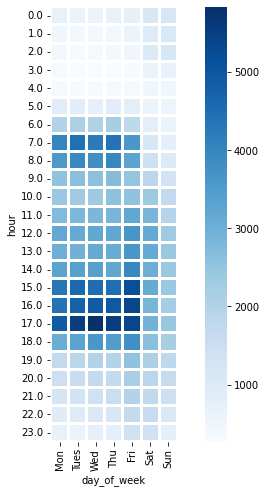

In [15]:
cdot['day_of_week'] = cdot['date'].dt.day_name()
cdot['hour'] = cdot['time'].dt.hour
cdot_day_hour = cdot.groupby(['day_of_week','hour']).agg({'system': 'count'})
cdot_day_hour.columns=['crash_count']
cdot_day_hour = cdot_day_hour.reset_index()
piv = pd.pivot_table(cdot_day_hour,values="crash_count",index=["hour"],columns=["day_of_week"],fill_value=0)
column_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
piv_new = piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].copy()
piv_new = piv_new.rename(columns={"Monday":"Mon","Tuesday":"Tues","Wednesday":"Wed","Thursday":"Thu","Friday":"Fri","Saturday":"Sat","Sunday":"Sun"})
plt.subplots(figsize=(10,8))
ax = sns.heatmap(piv_new,linewidths=2, square=True, cmap='Blues')
plt.show()

In [16]:
piv_new

day_of_week,Mon,Tues,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0.0,723,624,642,687,756,1132,1186
1.0,507,390,400,462,585,984,1099
2.0,437,334,347,411,506,1039,1161
3.0,296,269,290,287,316,658,662
4.0,345,333,320,375,368,467,501
5.0,909,886,742,895,847,600,566
6.0,2015,2117,2030,2185,1795,852,640
7.0,4010,4452,4245,4382,3603,1173,806
8.0,3570,3913,3809,3988,3303,1425,1010


In [18]:
cdot

,system,rte,sec,mp,date,time,severity,injlevel_1,injlevel_2,injlevel_3,...,drvinj_3,dui_1,dui_2,dui_3,city,county,latitude,longitude,day_of_week,hour
0,CITY STREET,0.0,NaN,0.00,2017-01-04,2022-10-23 21:45:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,ARVADA,JEFFERSON,0.000000,0.000000,Wednesday,21.0
1,CITY STREET,0.0,NaN,0.00,2017-12-18,2022-10-23 00:18:00,PDO,1.0,0.0,0.0,...,NaN,Y,N,N,GREELEY,WELD,0.000000,0.000000,Monday,0.0
2,CITY STREET,0.0,NaN,0.00,2017-07-21,2022-10-23 01:00:00,PDO,1.0,0.0,0.0,...,NaN,N,N,N,DELTA,DELTA,0.000000,0.000000,Friday,1.0
3,CITY STREET,0.0,NaN,0.00,2017-06-05,2022-10-23 15:29:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,STERLING,LOGAN,0.000000,0.000000,Monday,15.0
4,CITY STREET,0.0,NaN,0.00,2017-09-12,2022-10-23 09:36:00,INJ,1.0,1.0,0.0,...,NaN,N,N,N,COLORADO SPRINGS,EL PASO,0.000000,0.000000,Tuesday,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121627,STATE HIGHWAY,550.0,B,130.02,2019-12-12,2022-10-23 10:00:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,MONTROSE,MONTROSE,38.487127,-107.886831,Thursday,10.0
121628,STATE HIGHWAY,550.0,B,130.21,2019-07-26,2022-10-23 14:29:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,MONTROSE,MONTROSE,38.489144,-107.889057,Friday,14.0
121629,STATE HIGHWAY,550.0,B,130.22,2019-05-15,2022-10-23 13:50:00,INJ,1.0,5.0,0.0,...,NaN,N,N,N,MONTROSE,MONTROSE,38.489240,-107.889162,Wednesday,13.0
121630,STATE HIGHWAY,550.0,B,130.22,2019-10-07,2022-10-23 16:43:00,INJ,1.0,0.0,1.0,...,NaN,N,N,N,MONTROSE,MONTROSE,38.489240,-107.889162,Monday,16.0


In [21]:
waze = pd.read_csv(data_folder + "Waze_Cleaned.csv")
weather = pd.read_csv(data_folder + "Weather_cleaned.csv")

In [26]:
cdot.head()

,system,rte,sec,mp,date,time,severity,injlevel_1,injlevel_2,injlevel_3,...,drvinj_3,dui_1,dui_2,dui_3,city,county,latitude,longitude,day_of_week,hour
0,CITY STREET,0.0,NaN,0.0,2017-01-04,2022-10-23 21:45:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,ARVADA,JEFFERSON,0.0,0.0,Wednesday,21.0
1,CITY STREET,0.0,NaN,0.0,2017-12-18,2022-10-23 00:18:00,PDO,1.0,0.0,0.0,...,NaN,Y,N,N,GREELEY,WELD,0.0,0.0,Monday,0.0
2,CITY STREET,0.0,NaN,0.0,2017-07-21,2022-10-23 01:00:00,PDO,1.0,0.0,0.0,...,NaN,N,N,N,DELTA,DELTA,0.0,0.0,Friday,1.0
3,CITY STREET,0.0,NaN,0.0,2017-06-05,2022-10-23 15:29:00,PDO,2.0,0.0,0.0,...,NaN,N,N,N,STERLING,LOGAN,0.0,0.0,Monday,15.0
4,CITY STREET,0.0,NaN,0.0,2017-09-12,2022-10-23 09:36:00,INJ,1.0,1.0,0.0,...,NaN,N,N,N,COLORADO SPRINGS,EL PASO,0.0,0.0,Tuesday,9.0


In [22]:
waze.head()

,Unnamed: 0,street,highway,detectionDateTS,driversCount,regularSpeed,jamLevel,time
0,0,Bandley Dr,False,2021-07-14 03:49:47 UTC,2,41.55,3,2021071320
1,1,E Cheyenne Mountain Blvd,False,2020-10-22 21:25:55 UTC,13,31.49,3,2020102214
2,2,Gleneagle Dr,False,2020-02-15 23:15:27 UTC,35,42.67,4,2020021516
3,3,S Gate Blvd,False,2020-02-16 04:32:03 UTC,126,59.11,3,2020021521
4,4,McLaughlin Rd,False,2019-10-29 14:17:43 UTC,8,44.46,4,2019102907


In [23]:
weather.head()

,Unnamed: 0,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_description
0,138552,2015-01-01 00:00:00,19.058,1020,48,4.6,150,NaN,NaN,20,4
1,138553,2015-01-01 01:00:00,21.614,1019,57,2.1,190,NaN,NaN,1,28
2,138554,2015-01-01 02:00:00,21.830,1019,54,3.1,180,NaN,NaN,1,28
3,138555,2015-01-01 03:00:00,17.600,1019,66,1.0,300,NaN,NaN,1,28
4,138556,2015-01-01 04:00:00,17.474,1019,68,0.5,160,NaN,NaN,1,28


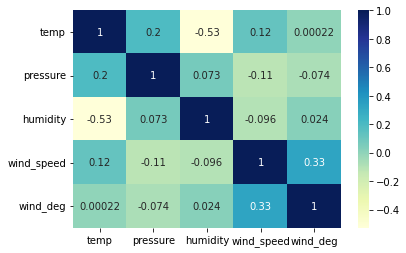

In [24]:
weather_selected = weather[['temp','pressure','humidity','wind_speed','wind_deg']]
corr = weather_selected.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

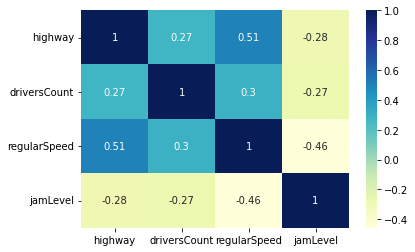

In [25]:
waze_selected = waze[['highway','driversCount','regularSpeed','jamLevel']]
corr = waze_selected.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [29]:
cdot.city.unique()

array(['ARVADA', 'GREELEY', 'DELTA', 'STERLING', 'COLORADO SPRINGS',
       'THORNTON', 'WESTMINSTER', nan, 'NORTHGLENN', 'LA JUNTA',
       'COMMERCE CITY', 'ADAMS CITY', 'FEDERAL HEIGHTS', 'PUEBLO',
       'GLENWOOD SPRINGS', 'CANON CITY', 'DENVER', 'LAKEWOOD', 'LONGMONT',
       'AURORA', 'BRIGHTON', 'BROOMFIELD', 'GOLDEN', 'DURANGO', 'SALIDA',
       'ALAMOSA', 'SILVERTHORNE', 'STEAMBOAT SPRINGS', 'BOULDER',
       'BERTHOUD', 'WINDSOR', 'GRAND JUNCTION', 'RIFLE', 'PAGOSA SPRINGS',
       'LOVELAND', 'LAFAYETTE', 'ERIE', 'BYERS', 'EVANS', 'EVERGREEN',
       'BURLINGTON', 'GUNNISON', 'DOLORES', 'CRAIG', 'GILCREST',
       'SILVERTON', 'FORT COLLINS', 'MONTROSE', 'IDAHO SPRINGS', 'EADS',
       'LAMAR', 'CENTENNIAL', 'TIMNATH', 'WIGGINS', 'LOCHBUIE', 'MEAD',
       'FRUITA', 'EDGEWATER', 'AULT', 'YUMA', 'JOHNSTOWN', 'ESTES PARK',
       'EATON', 'TRINIDAD', 'GYPSUM', 'FIRESTONE', 'SEVERANCE',
       'MONUMENT', 'CRESTED BUTTE', 'CORTEZ', 'NEDERLAND', 'PALISADE',
       'GREENWOOD VI